In [1]:
import pandas as pd
import numpy as np


In [2]:
data_path = '/content/drive/MyDrive/Colab Notebooks/credit card fraud detection/creditcard.csv'
data = pd.read_csv(data_path)

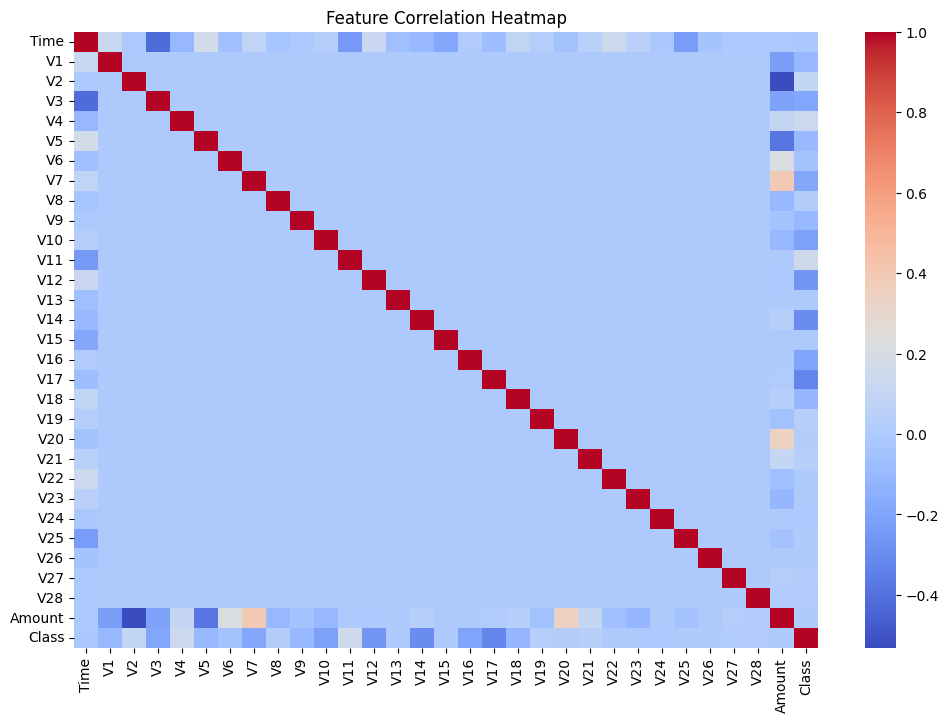

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


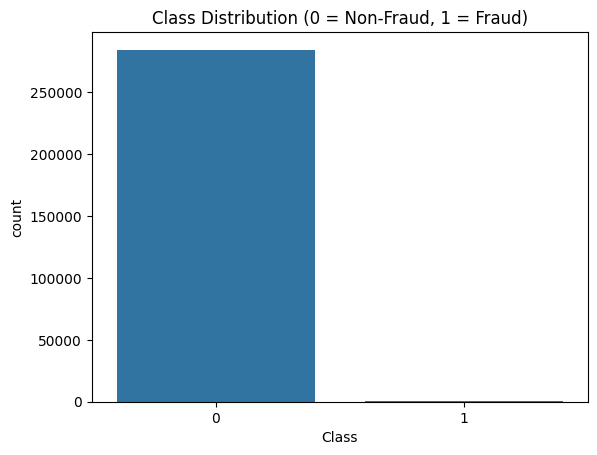

In [16]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

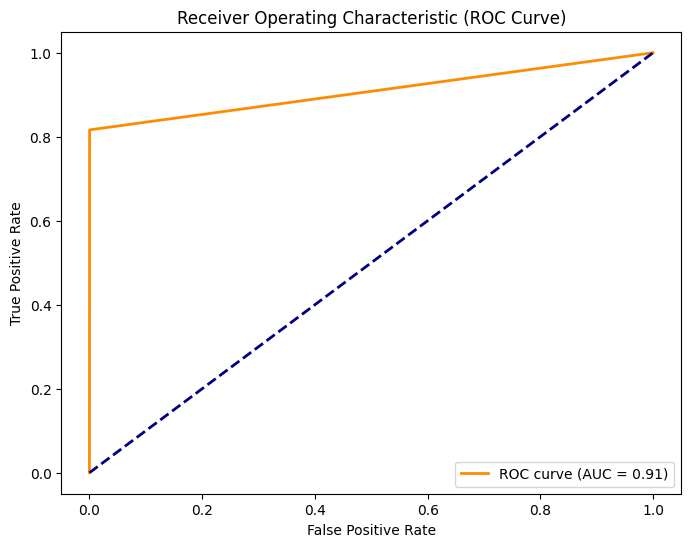

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.show()

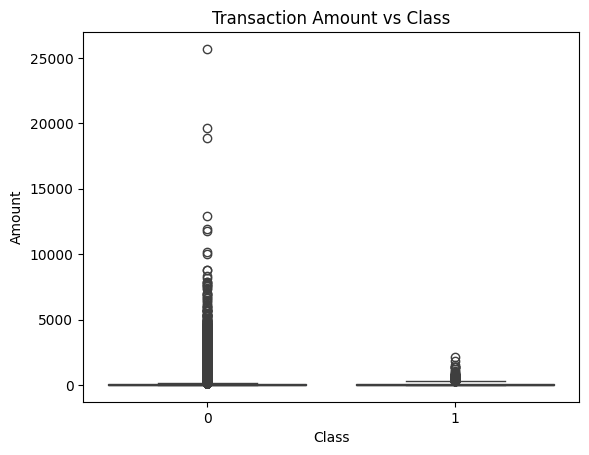

In [18]:
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Transaction Amount vs Class")
plt.show()


In [3]:
len(data)

284807

In [4]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
267893,162971.0,2.093991,-0.371875,-1.554451,-1.718332,0.013063,-1.050320,0.092472,-0.242615,1.190307,...,-0.191194,-0.412621,0.308839,0.771282,-0.120032,-0.571496,-0.022938,-0.057423,1.00,0
41487,40705.0,-0.787487,0.509837,1.551398,1.199270,0.605909,-0.354848,0.961474,-0.252029,-0.607753,...,-0.387637,-0.994903,0.361628,-0.019104,-0.517121,-0.746656,-0.119138,-0.059234,57.90,0
187883,127729.0,-1.179943,-0.063741,1.938964,-0.629219,0.841502,-0.226182,-0.085349,0.235151,0.398188,...,0.232334,0.541208,-0.366357,0.597894,0.780713,-0.113862,0.034535,0.082491,11.50,0
15179,26533.0,-0.846350,0.458292,1.736565,-1.173054,-0.235803,-0.799003,0.618523,0.084889,0.007205,...,0.003137,-0.056245,0.147240,0.416429,-0.446179,0.728235,0.250026,0.179777,54.79,0
182325,125352.0,-0.507947,-0.546918,2.291673,-2.112876,-0.845382,-0.425270,-0.858402,0.256730,-0.103172,...,0.512459,1.377962,-0.181414,-0.003468,-0.405188,-0.195736,0.166438,0.161655,0.02,0


In [5]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [6]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


1 - Fraud
0 - Normal

In [7]:
X = data.drop('Class' , axis=1)
y = data['Class']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [9]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train[["Time", "Amount"]] = scaler.fit_transform(X_train[["Time", "Amount"]])
X_test[["Time", "Amount"]] = scaler.transform(X_test[["Time", "Amount"]])

In [10]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print(f"Before SMOTE: {sum(y_train==1)} frauds")
print(f"After SMOTE: {sum(y_res==1)} frauds")

Before SMOTE: 394 frauds
After SMOTE: 227451 frauds


In [12]:
model = RandomForestClassifier(
    n_estimators=50,        # fewer trees = faster
    max_depth=10,           # limit depth = faster
    class_weight='balanced',# handles imbalance
    n_jobs=-1,              # use all CPU cores
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [13]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [14]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
 [[56851    13]
 [   18    80]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8602    0.8163    0.8377        98

    accuracy                         0.9995     56962
   macro avg     0.9299    0.9080    0.9187     56962
weighted avg     0.9994    0.9995    0.9994     56962

ROC-AUC Score: 0.9841725836367187
